# K-Means

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
# Create a synthetic dataset with 3 clusters
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

In [4]:
# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

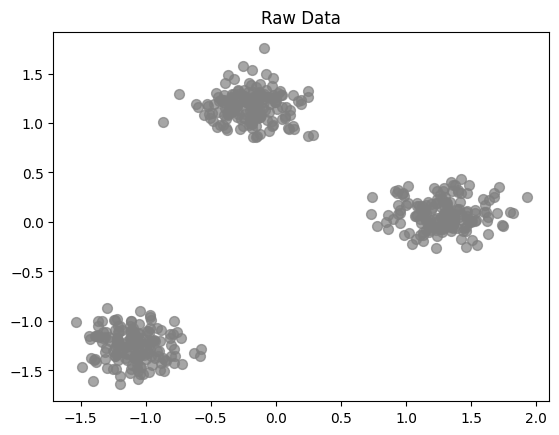

In [5]:
# Visualizing the raw data
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, c='gray', alpha=0.7)
plt.title('Raw Data')
plt.show()

In [6]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [7]:
# Predict cluster labels
y_kmeans = kmeans.predict(X_scaled)

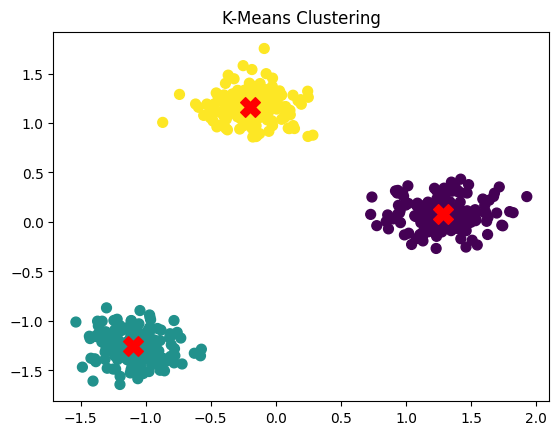

In [8]:
# Visualizing the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centroids
plt.title('K-Means Clustering')
plt.show()

In [9]:
# Print cluster centroids
print("Cluster Centroids:\n", kmeans.cluster_centers_)

Cluster Centroids:
 [[ 1.28325069  0.07843885]
 [-1.09315471 -1.25231533]
 [-0.19664182  1.16637758]]


# DBSCAN

In [11]:
# Import DBSCAN from sklearn
from sklearn.cluster import DBSCAN

In [12]:

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)

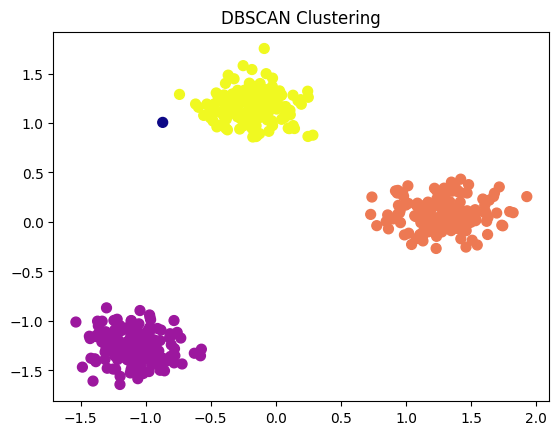

In [13]:
# Visualizing the DBSCAN clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan, cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.show()

In [14]:
# Print unique labels (clusters)
print("DBSCAN Cluster Labels:", np.unique(y_dbscan))

DBSCAN Cluster Labels: [-1  0  1  2]


In [15]:
# Check for noise points (outliers are labeled as -1)
outliers = X_scaled[y_dbscan == -1]
print(f"Number of outliers detected by DBSCAN: {len(outliers)}")

Number of outliers detected by DBSCAN: 1


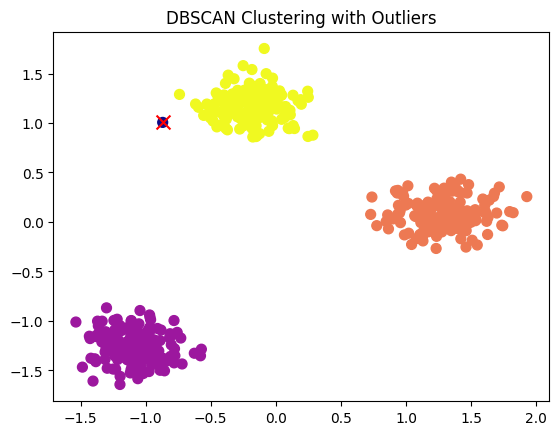

In [16]:
# Plot the outliers (if any)
if len(outliers) > 0:
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_dbscan, cmap='plasma', s=50)
    plt.scatter(outliers[:, 0], outliers[:, 1], s=100, c='red', marker='x')  # Mark outliers
    plt.title('DBSCAN Clustering with Outliers')
    plt.show()